In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import plotly.express as px

## Task 1

In [2]:
Musk = pd.read_csv("Musk1.csv", header = None)

In [3]:
Musk.head()

0    1    2    3    4    5    6    7    8    9    ...  158  159  160  161  \
0    1    1   42 -198 -109  -75 -117   11   23  -88  ... -238  -74 -129 -120   
1    1    1   42 -191 -142  -65 -117   55   49 -170  ... -238 -302   60 -120   
2    1    1   42 -191 -142  -75 -117   11   49 -161  ... -238  -73 -127 -120   
3    1    1   42 -198 -110  -65 -117   55   23  -95  ... -238 -302   60 -120   
4    1    2   42 -198 -102  -75 -117   10   24  -87  ... -238  -73 -127   51   

   162  163  164  165  166  167  
0  -38   30   48  -37    6   30  
1  -39   31   48  -37    5   30  
2  -38   30   48  -37    5   31  
3  -39   30   48  -37    6   30  
4  128  144   43  -30   14   26  

[5 rows x 168 columns]

In [4]:
Musk_Feat = Musk.iloc[:,2:Musk.shape[1]]

## a.

In [5]:
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.preprocessing import scale
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [6]:
Musk_Feat = Musk.iloc[:,2:Musk.shape[1]]
Musk_Feat = pd.DataFrame(scale(Musk_Feat),columns=Musk_Feat.columns)

# mds
mds = MDS(n_components=3)
musk_mds = pd.DataFrame(mds.fit_transform(Musk_Feat))

# pca
pca = PCA(n_components=3)
musk_pca = pd.DataFrame(pca.fit_transform(Musk_Feat))

In [7]:
# join labels
musk_mds = musk_mds.join(Musk.iloc[:,0],rsuffix = "_label")
musk_pca = musk_pca.join(Musk.iloc[:,0],rsuffix = "_label")

In [8]:
musk_pca = musk_pca.rename(columns = {'0': "pc_1", 1: 'pc_2', 2: 'pc_3',"0_label" : "label"})
musk_mds = musk_mds.rename(columns = {'0': "latent_1", 1: 'latent_2', 2: 'latent_3',"0_label" : "label"})

In [9]:
musk_pca["label"] = musk_pca["label"].astype(str)
musk_mds["label"] = musk_mds["label"].astype(str)

In [10]:
musk_pca.head()

pc_1      pc_2      pc_3 label
0  0.787850  8.664480  2.433177     1
1  0.782505  8.544104  2.636037     1
2  0.248081  8.360294  2.454432     1
3  1.356422  9.106098  2.639127     1
4  1.459051  8.685006 -0.016682     1

In [11]:
musk_mds.head()

latent_1  latent_2  latent_3 label
0  12.184725 -5.419227 -2.253067     1
1  11.773015 -5.169933 -3.041294     1
2  11.337924 -5.696089 -2.997657     1
3  12.636060 -4.787359 -2.838407     1
4  11.263127 -3.007464 -5.456631     1

In [12]:
fig = px.scatter_3d(musk_pca, x="pc_1", y="pc_2", z="pc_3",
                    color='label', width = 800, height = 800 ,title = "PCA with 3 Components")
fig.show()

In [13]:
fig = px.scatter_3d(musk_mds, x="latent_1", y="latent_2", z="latent_3",
                    color='label', width = 800, height = 800 ,title = "MDS with 3 Latent Variables")
fig.show()

- Looking at the graphs, I can't say our assumption is good enough. Because both PCA and MDS is not able to explain the labels with 3 latent variables, since they seem pretty mixed.

#### b.

In [14]:
Musk = Musk.rename(columns={0: "BAGLABEL", 1: "BAGID"})

Musk = Musk.groupby('BAGID').mean().reset_index(drop=True)

In [15]:
Musk.head()

BAGLABEL          2           3           4          5      6          7  \
0       1.0  42.000000 -194.500000 -125.750000 -70.000000 -117.0  33.000000   
1       1.0  42.000000 -194.500000 -122.000000 -70.000000 -117.0  33.000000   
2       1.0  42.000000 -166.000000 -102.500000 -30.500000 -116.5   5.000000   
3       1.0  42.666667 -154.666667  -77.333333 -42.333333 -117.0  22.333333   
4       1.0  61.500000  -72.500000 -102.000000 -25.250000  -34.0  19.000000   

           8      9         10  ...         158     159   160         161  \
0  36.000000 -128.5 -36.500000  ... -238.000000 -187.75 -34.0 -120.000000   
1  36.250000 -128.0 -36.750000  ... -238.000000 -186.25 -32.5   51.000000   
2  27.500000 -142.5 -37.500000  ... -235.500000  -57.50 -45.5   13.000000   
3  21.666667 -132.0 -23.666667  ... -237.333333 -142.00 -15.0  -80.333333   
4  29.000000 -143.5 -37.750000  ... -237.750000 -117.25 -60.5    5.000000   

          162         163        164        165        166        167  
0  -38.500000   30.250000  48.000000 -37.000000   5.500000  30.250000  
1  126.500000  143.500000  42.750000 -30.250000  14.000000  26.500000  
2  120.500000  133.500000  55.500000 -32.500000   2.000000  16.500000  
3  -33.666667   31.333333  50.333333 -38.333333   5.333333  32.333333  
4   75.750000  136.750000  68.500000 -26.750000  -0.250000  36.750000  

[5 rows x 167 columns]

In [16]:
Musk_Feat = Musk.iloc[:,2:Musk.shape[1]]
Musk_Feat = pd.DataFrame(scale(Musk_Feat),columns=Musk_Feat.columns)

# mds
mds = MDS(n_components=3)
musk_mds = pd.DataFrame(mds.fit_transform(Musk_Feat))

# pca
pca = PCA(n_components=3)
musk_pca = pd.DataFrame(pca.fit_transform(Musk_Feat))


In [17]:
# join labels
musk_mds = musk_mds.join(Musk.iloc[:,0],rsuffix = "_label")
musk_pca = musk_pca.join(Musk.iloc[:,0],rsuffix = "_label")

In [18]:
musk_pca = musk_pca.rename(columns = {0: "pc_1", 1: 'pc_2', 2: 'pc_3',"BAGLABEL" : "label"})
musk_mds = musk_mds.rename(columns = {0: "latent_1", 1: 'latent_2', 2: 'latent_3',"BAGLABEL" : "label"})

In [19]:
musk_pca["label"] = musk_pca["label"].astype(str)
musk_mds["label"] = musk_mds["label"].astype(str)

In [20]:
musk_pca

pc_1       pc_2       pc_3 label
0    1.592314   7.395266  -9.473518   1.0
1    3.537589   6.792198  -9.831541   1.0
2    4.414729   8.418682  -7.790094   1.0
3    3.411197   8.833639  -7.699197   1.0
4    5.213600   8.290778  -7.363469   1.0
..        ...        ...        ...   ...
87  -9.777667   1.284593   0.165081   0.0
88   1.194857  13.383118   9.916979   0.0
89   3.128256  13.055825   5.424648   0.0
90  14.034374   4.594630  11.672317   0.0
91   1.419544  -4.805572  -1.802744   0.0

[92 rows x 4 columns]

In [21]:
fig = px.scatter_3d(musk_pca, x="pc_1", y="pc_2", z="pc_3",
                    color='label', width = 800, height = 800 ,title = "PCA with 3 Components")
fig.show()

In [22]:
fig = px.scatter_3d(musk_mds, x="latent_1", y="latent_2", z="latent_3",
                    color='label', width = 800, height = 800 ,title = "MDS with 3 Latent Variables")
fig.show()

- When we take the average our dimensionality reduction methods seem to give better results. They are not seperated randomly as it was before. This supports my claim that our assumption was not good enough.

#### c.

In [23]:
from statistics import mode

- Another approach might be taking the most common one (mode). The custom function below finds the most common element in the array. If there is more then one, then it returns the average of them.

In [24]:
def most_common(x):
    try:
        return(mode(list(a)))
    except:
        temp = pd.DataFrame(data = {'level': x, 'countno' : np.repeat(1, len(x))})
        temp = temp.groupby("level").count().reset_index()
        temp["maxvalue"] = temp.countno.max()
        return(temp.loc[temp.countno == temp.maxvalue].level.mean())

In [25]:
Musk = pd.read_csv("Musk1.csv", header = None)

Musk = Musk.rename(columns={0: "BAGLABEL", 1: "BAGID"})

In [26]:
Musk = Musk.groupby('BAGID').agg(lambda x: most_common(x))

- Musk data below is in format of figure 1.

In [27]:
Musk.head()

BAGLABEL          2           3           4          5      6  \
BAGID                                                                  
1             1  42.000000 -194.500000 -142.000000 -70.000000 -117.0   
2             1  42.000000 -194.500000 -122.000000 -70.000000 -117.0   
3             1  42.000000 -166.000000 -102.500000 -30.500000 -116.5   
4             1  42.666667 -154.666667  -77.333333 -42.333333 -117.0   
5             1  61.500000  -72.500000 -102.000000 -25.250000 -117.0   

               7          8      9         10  ...         158     159   160  \
BAGID                                          ...                             
1      33.000000  36.000000 -128.5 -36.500000  ... -238.000000 -302.00  60.0   
2      55.000000  49.000000 -128.0 -45.000000  ... -238.000000 -300.00  61.0   
3       5.000000  27.500000 -142.5 -37.500000  ... -235.500000  -57.50 -45.5   
4      22.333333  21.666667 -132.0 -23.666667  ... -237.333333 -142.00 -15.0   
5      19.000000  29.000000 -143.5 -44.000000  ... -237.000000 -117.25 -60.5   

              161         162         163        164        165    166  \
BAGID                                                                    
1     -120.000000  -38.500000   30.000000  48.000000 -37.000000   5.50   
2       51.000000  127.000000  143.500000  42.000000 -30.000000  14.00   
3       13.000000  120.500000  133.500000  55.500000 -32.500000   2.00   
4      -80.333333  -33.666667   31.333333  50.333333 -38.333333   7.00   
5        5.000000   75.750000  136.750000  68.500000 -26.750000  -0.25   

             167  
BAGID             
1      30.000000  
2      26.000000  
3      16.500000  
4      32.333333  
5      36.750000  

[5 rows x 167 columns]

## Task 2

#### 1.

In [28]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 

In [29]:
img = mpimg.imread('Foto_256_256.jpg') 

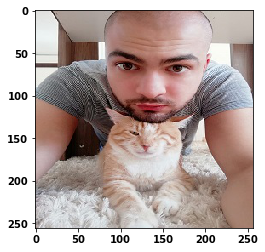

In [30]:
plt.imshow(img)

#### 2.

In [31]:
from copy import deepcopy
img_noise = deepcopy(img)

In [32]:
MinPixel = img_noise.min()
MaxPixel = img_noise.max()

img_noise = img_noise + np.random.randint(MinPixel,(MaxPixel * 0.1),size = img_noise.shape)
# max value cannot exceed 255
img_noise[img_noise >= 255] = 255

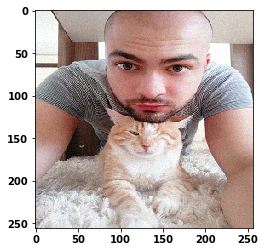

In [33]:
plt.imshow(img_noise)

In [34]:
img_noise_red = deepcopy(img_noise)
img_noise_green = deepcopy(img_noise)
img_noise_blue = deepcopy(img_noise)

img_noise_red[:,:,1] = 0
img_noise_red[:,:,2] = 0

img_noise_green[:,:,0] = 0
img_noise_green[:,:,2] = 0

img_noise_blue[:,:,0] = 0
img_noise_blue[:,:,1] = 0

Text(0.5, 1.0, 'Blue Channel')

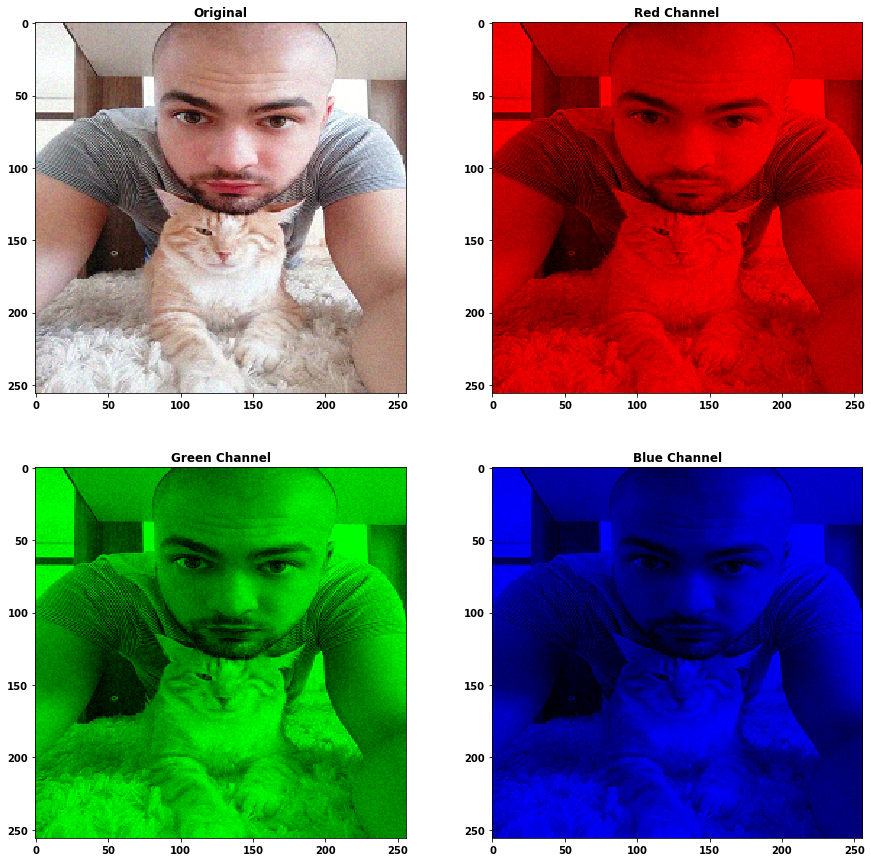

In [35]:
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = (15,15))

ax[0,0].imshow(img_noise)
ax[0,0].set_title("Original")


ax[0,1].imshow(img_noise_red)
ax[0,1].set_title("Red Channel")


ax[1,0].imshow(img_noise_green)
ax[1,0].set_title("Green Channel")


ax[1,1].imshow(img_noise_blue)
ax[1,1].set_title("Blue Channel")

#### 3.

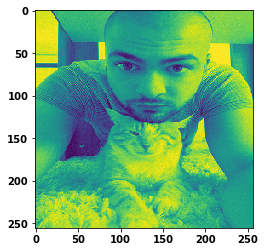

In [36]:
# https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python
img_grayscale = np.dot(img_noise[...,:3], [0.2989, 0.5870, 0.1140])

plt.imshow(img_grayscale)

In [37]:
from sklearn.feature_extraction import image

In [38]:
patches = image.extract_patches_2d(img_grayscale, (25, 25))
patches = patches.reshape((53824,625))

#### a.

In [39]:
pca = PCA(n_components = 100)

pca.fit(patches)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

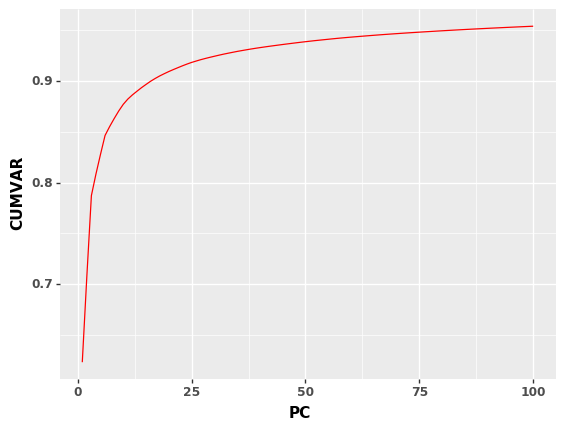

<ggplot: (119068208802)>

In [40]:
from plotnine import *
pca_cumvar = pd.DataFrame(data = {'PC' : np.arange(1,len(pca.explained_variance_ratio_) + 1), 'CUMVAR' : pca.explained_variance_ratio_.cumsum()})
ggplot(pca_cumvar) + geom_line(aes(x = "PC", y = "CUMVAR" ), colour = "r")

In [41]:
pca_cumvar.head()

PC    CUMVAR
0   1  0.622994
1   2  0.707505
2   3  0.787124
3   4  0.808338
4   5  0.827726

- Looking at the graph we can say that after 25th marginal utility (proportion of ratio that covers) of principal components is decreased significantly. Another impportant inference is that first principal component explains 0.62 of the total variance.

#### b.

In [42]:
pca_im = PCA(n_components = 3)
principals = pca_im.fit_transform(patches)

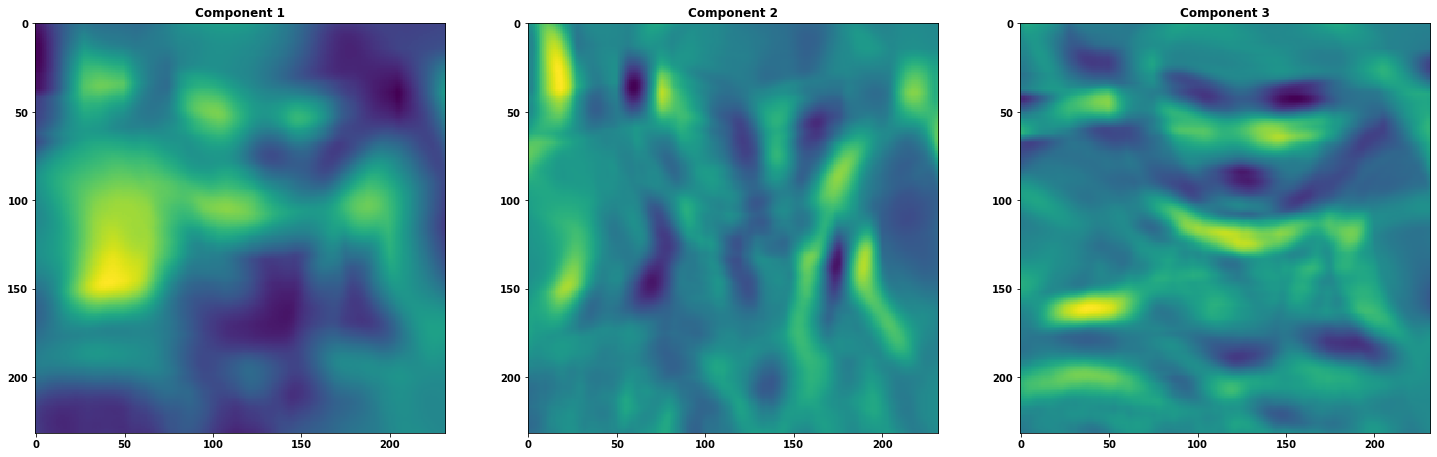

In [43]:
fig, ax = plt.subplots(1,3,figsize = (25,25))

for i in range(3):
    im_comp = principals[:,i].reshape(232,232)
    ax[i].imshow(im_comp)
    ax[i].set_title("Component {}".format(i+1))

In [44]:
pca_im.explained_variance_ratio_

array([0.62299388, 0.0845116 , 0.07961849])

- Considering the difference between 3 components in terms of their variance explaination, I would expect 1st image to be more apperant compared to others. But still main frame of the image is clearer then the others.

#### c.

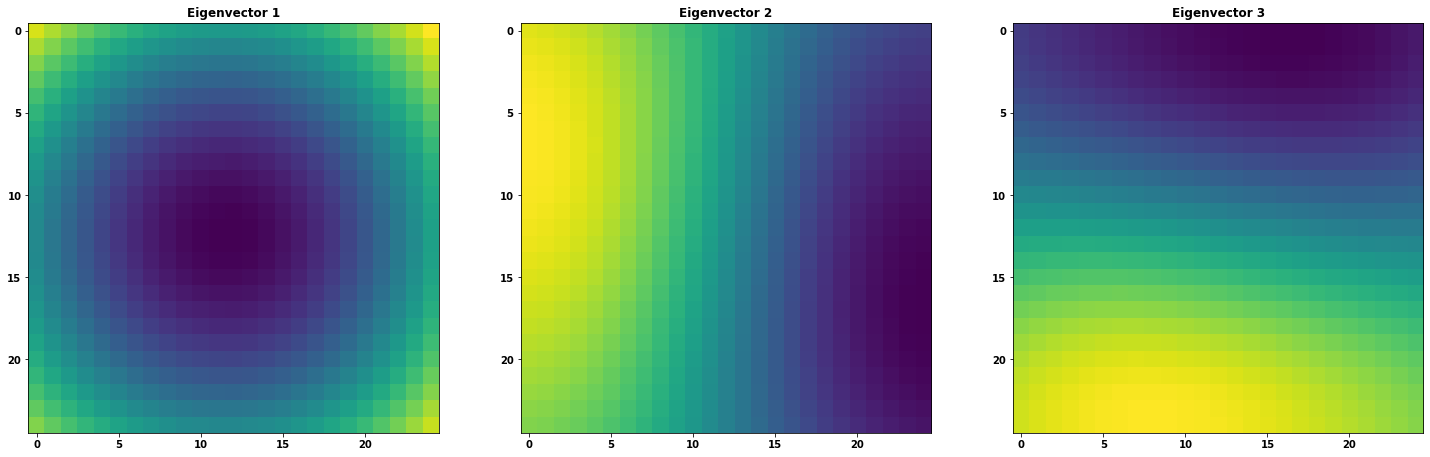

In [45]:
fig, ax = plt.subplots(1,3,figsize = (25,25))
for i in range(3):
    eigen = pca_im.components_[i].reshape(25, 25)
    ax[i].imshow(eigen)
    ax[i].set_title("Eigenvector {}".format(i+1))

- These reshaped version of eigenvectors actually represent typical patches. Different combination of them may help us reconstruct an image which close to the original one.